In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
pd.set_option('display.max_columns',50)

In [2]:
df=pd.read_csv('/kaggle/input/paddymandya/Paddy_updated.csv')

In [3]:
df.shape

(288, 26)

In [4]:
df.columns

Index(['State', 'District', 'Market', 'crop', 'Variety', 'Grade', 'date',
       'Min_Price', 'Max_Price', 'price', 'Commodity_Code', 'Temp', 'Humidity',
       'Pressure', 'Rain', 'Wind', 'year', 'month', 'day', 'day_of_week',
       'season', 'crop_encoded', 'season_encoded', 'price_lag_1',
       'price_lag_7', 'price_rolling_mean_7'],
      dtype='object')

In [5]:
df.describe

<bound method NDFrame.describe of          State District       Market                 crop       Variety  \
0    Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)   Paddy Jyoti   
1    Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)  Paddy Coarse   
2    Karnataka   Mandya       Mandya  Paddy(Dhan)(Common)          Jaya   
3    Karnataka   Mandya  Pandavapura  Paddy(Dhan)(Common)   Paddy Dappa   
4    Karnataka   Mandya       Maddur  Paddy(Dhan)(Common)         Paddy   
..         ...      ...          ...                  ...           ...   
283  Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)  Paddy Coarse   
284  Karnataka   Mandya    Malavalli  Paddy(Dhan)(Common)         Paddy   
285  Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)  Paddy Coarse   
286  Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)  Paddy Coarse   
287  Karnataka   Mandya     K.R. Pet  Paddy(Dhan)(Common)  Paddy Coarse   

     Grade        date  Min_Price  Max_Price  price  Commodity_Co

In [6]:
df.head(10)

,State,District,Market,crop,Variety,Grade,date,Min_Price,Max_Price,price,Commodity_Code,Temp,Humidity,Pressure,Rain,Wind,year,month,day,day_of_week,season,crop_encoded,season_encoded,price_lag_1,price_lag_7,price_rolling_mean_7
0,Karnataka,Mandya,K.R. Pet,Paddy(Dhan)(Common),Paddy Jyoti,FAQ,2020-01-07,1650,1650,1650,2,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1550.0,2400.0,1925.714286
1,Karnataka,Mandya,K.R. Pet,Paddy(Dhan)(Common),Paddy Coarse,FAQ,2020-01-07,1500,1500,1500,2,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1650.0,2500.0,1818.571429
2,Karnataka,Mandya,Mandya,Paddy(Dhan)(Common),Jaya,FAQ,2020-01-07,1500,1700,1500,2,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1500.0,1400.0,1675.714286
3,Karnataka,Mandya,Pandavapura,Paddy(Dhan)(Common),Paddy Dappa,FAQ,2020-01-07,1700,1700,1700,2,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1500.0,2000.0,1690.000000
4,Karnataka,Mandya,Maddur,Paddy(Dhan)(Common),Paddy,FAQ,2020-01-12,1815,1815,1815,2,20.37,80.47,93.37,0.00,2.18,2020.0,1.0,12.0,6.0,Winter,0,3,1700.0,1680.0,1647.142857
5,Karnataka,Mandya,K.R. Pet,Paddy(Dhan)(Common),Paddy Coarse,FAQ,2020-02-01,1400,2450,2450,2,24.28,73.48,93.42,0.00,1.68,2020.0,2.0,1.0,5.0,Winter,0,3,1815.0,1950.0,1666.428571
6,Karnataka,Mandya,Maddur,Paddy(Dhan)(Common),Paddy,FAQ,2020-02-01,1820,1820,1820,2,24.28,73.48,93.42,0.00,1.68,2020.0,2.0,1.0,5.0,Winter,0,3,2450.0,1550.0,1737.857143
7,Karnataka,Mandya,Srirangapattana,Paddy(Dhan)(Common),Paddy Jyoti,FAQ,2020-02-01,2250,2250,2250,2,24.28,73.48,93.42,0.00,1.68,2020.0,2.0,1.0,5.0,Winter,0,3,1820.0,1650.0,1776.428571
8,Karnataka,Mandya,Srirangapattana,Paddy(Dhan)(Common),1001,FAQ,2020-02-01,1500,1892,1550,2,24.28,73.48,93.42,0.00,1.68,2020.0,2.0,1.0,5.0,Winter,0,3,2250.0,1500.0,1862.142857
9,Karnataka,Mandya,Srirangapattana,Paddy(Dhan)(Common),1001,FAQ,2020-02-02,1785,1785,1785,2,24.79,53.00,93.40,0.00,2.92,2020.0,2.0,2.0,6.0,Winter,0,3,1550.0,1500.0,1869.285714


In [7]:
df.dtypes

State                    object
District                 object
Market                   object
crop                     object
Variety                  object
Grade                    object
date                     object
Min_Price                 int64
Max_Price                 int64
price                     int64
Commodity_Code            int64
Temp                    float64
Humidity                float64
Pressure                float64
Rain                    float64
Wind                    float64
year                    float64
month                   float64
day                     float64
day_of_week             float64
season                   object
crop_encoded              int64
season_encoded            int64
price_lag_1             float64
price_lag_7             float64
price_rolling_mean_7    float64
dtype: object

In [8]:
df=df.drop(['Commodity_Code','State','District'],axis=1)

In [9]:
df.head(5)

,Market,crop,Variety,Grade,date,Min_Price,Max_Price,price,Temp,Humidity,Pressure,Rain,Wind,year,month,day,day_of_week,season,crop_encoded,season_encoded,price_lag_1,price_lag_7,price_rolling_mean_7
0,K.R. Pet,Paddy(Dhan)(Common),Paddy Jyoti,FAQ,2020-01-07,1650,1650,1650,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1550.0,2400.0,1925.714286
1,K.R. Pet,Paddy(Dhan)(Common),Paddy Coarse,FAQ,2020-01-07,1500,1500,1500,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1650.0,2500.0,1818.571429
2,Mandya,Paddy(Dhan)(Common),Jaya,FAQ,2020-01-07,1500,1700,1500,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1500.0,1400.0,1675.714286
3,Pandavapura,Paddy(Dhan)(Common),Paddy Dappa,FAQ,2020-01-07,1700,1700,1700,24.08,77.27,92.74,0.05,3.58,2020.0,1.0,7.0,1.0,Winter,0,3,1500.0,2000.0,1690.000000
4,Maddur,Paddy(Dhan)(Common),Paddy,FAQ,2020-01-12,1815,1815,1815,20.37,80.47,93.37,0.00,2.18,2020.0,1.0,12.0,6.0,Winter,0,3,1700.0,1680.0,1647.142857


In [10]:
df=df[['Variety', 'Grade', 'date',
       'year', 'month', 'day', 'day_of_week',
       'Temp', 'Humidity','Pressure', 'Rain', 'Wind',
       'Min_Price', 'Max_Price', 'price', 
       'price_lag_1','price_lag_7', 'price_rolling_mean_7']]

In [11]:
df.head(7)

,Variety,Grade,date,year,month,day,day_of_week,Temp,Humidity,Pressure,Rain,Wind,Min_Price,Max_Price,price,price_lag_1,price_lag_7,price_rolling_mean_7
0,Paddy Jyoti,FAQ,2020-01-07,2020.0,1.0,7.0,1.0,24.08,77.27,92.74,0.05,3.58,1650,1650,1650,1550.0,2400.0,1925.714286
1,Paddy Coarse,FAQ,2020-01-07,2020.0,1.0,7.0,1.0,24.08,77.27,92.74,0.05,3.58,1500,1500,1500,1650.0,2500.0,1818.571429
2,Jaya,FAQ,2020-01-07,2020.0,1.0,7.0,1.0,24.08,77.27,92.74,0.05,3.58,1500,1700,1500,1500.0,1400.0,1675.714286
3,Paddy Dappa,FAQ,2020-01-07,2020.0,1.0,7.0,1.0,24.08,77.27,92.74,0.05,3.58,1700,1700,1700,1500.0,2000.0,1690.000000
4,Paddy,FAQ,2020-01-12,2020.0,1.0,12.0,6.0,20.37,80.47,93.37,0.00,2.18,1815,1815,1815,1700.0,1680.0,1647.142857
5,Paddy Coarse,FAQ,2020-02-01,2020.0,2.0,1.0,5.0,24.28,73.48,93.42,0.00,1.68,1400,2450,2450,1815.0,1950.0,1666.428571
6,Paddy,FAQ,2020-02-01,2020.0,2.0,1.0,5.0,24.28,73.48,93.42,0.00,1.68,1820,1820,1820,2450.0,1550.0,1737.857143


In [12]:
df.shape

(288, 18)

In [13]:
df.isna().sum()

Variety                 0
Grade                   0
date                    0
year                    0
month                   0
day                     0
day_of_week             0
Temp                    0
Humidity                0
Pressure                0
Rain                    0
Wind                    0
Min_Price               0
Max_Price               0
price                   0
price_lag_1             0
price_lag_7             0
price_rolling_mean_7    0
dtype: int64

In [14]:
print(df.duplicated())
print('')
df.loc[df.duplicated()]
#In Pandas duplicate is ment wrt rows same to one another not a single column or value in a column

0      False
1      False
2      False
3      False
4      False
       ...  
283    False
284    False
285    False
286    False
287    False
Length: 288, dtype: bool



,Variety,Grade,date,year,month,day,day_of_week,Temp,Humidity,Pressure,Rain,Wind,Min_Price,Max_Price,price,price_lag_1,price_lag_7,price_rolling_mean_7


In [15]:
df.columns

Index(['Variety', 'Grade', 'date', 'year', 'month', 'day', 'day_of_week',
       'Temp', 'Humidity', 'Pressure', 'Rain', 'Wind', 'Min_Price',
       'Max_Price', 'price', 'price_lag_1', 'price_lag_7',
       'price_rolling_mean_7'],
      dtype='object')

In [16]:
variety_grade_map = (
    df.groupby("Variety")["Grade"]
    .unique()
    .apply(list)
    .to_dict()
)

for v, grades in variety_grade_map.items():
    print(f"{v}: {grades}")

1001: ['FAQ']
Jaya: ['FAQ']
Paddy: ['FAQ', 'Ref grade-1']
Paddy Coarse: ['FAQ', 'Local', 'Ref grade-1']
Paddy Dappa: ['FAQ']
Paddy Jyoti: ['FAQ']
Paddy Medium: ['Medium']


In [17]:
print(df['year'].value_counts())
print('-------')
df['Variety'].value_counts()


year
2020.0    175
2025.0     53
2024.0     48
2021.0     11
2022.0      1
Name: count, dtype: int64
-------


Variety
Paddy Coarse    77
Paddy           66
1001            55
Jaya            45
Paddy Dappa     29
Paddy Jyoti     15
Paddy Medium     1
Name: count, dtype: int64

Text(0, 0.5, 'Occurence')

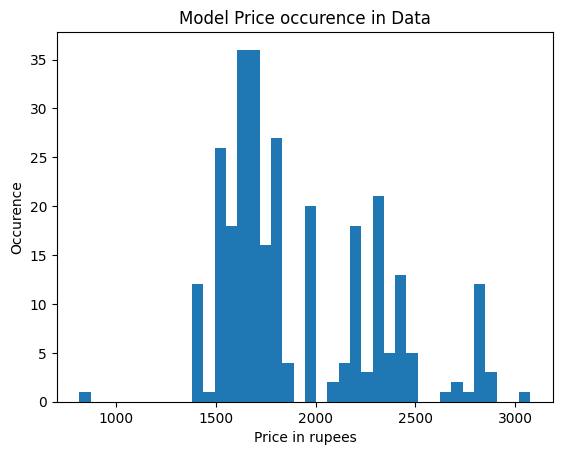

In [18]:
ax=df['price'].plot(kind='hist',title='Model Price occurence in Data',bins=40)
ax.set_xlabel('Price in rupees')
ax.set_ylabel('Occurence')

Text(0, 0.5, 'Occurence')

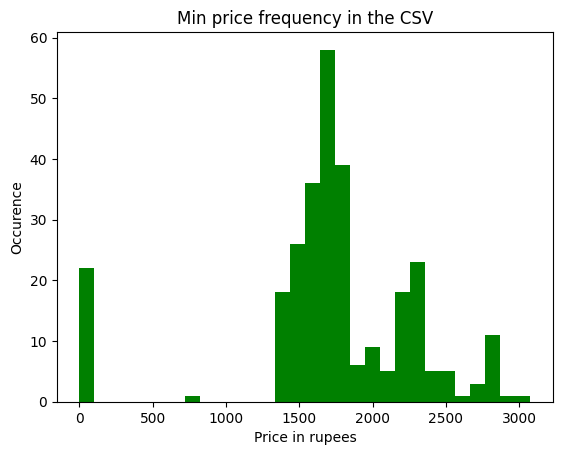

In [19]:
ax1=df['Min_Price'].plot(kind='hist',title='Min price frequency in the CSV',bins=30,color='green')
ax1.set_xlabel('Price in rupees')
ax1.set_ylabel('Occurence')

Text(0, 0.5, 'Occurence')

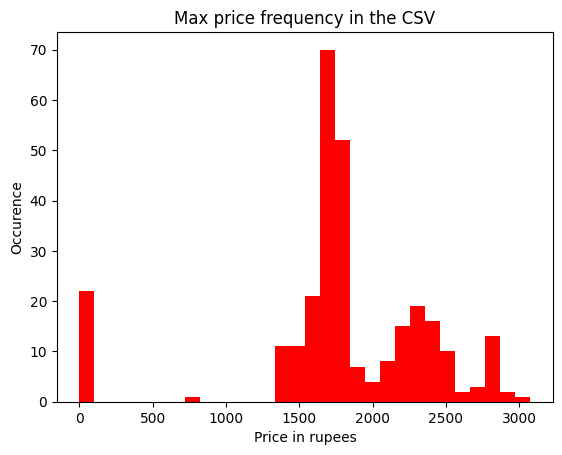

In [20]:
ax1=df['Max_Price'].plot(kind='hist',title='Max price frequency in the CSV',bins=30,color='red')
ax1.set_xlabel('Price in rupees')
ax1.set_ylabel('Occurence')

<Axes: >

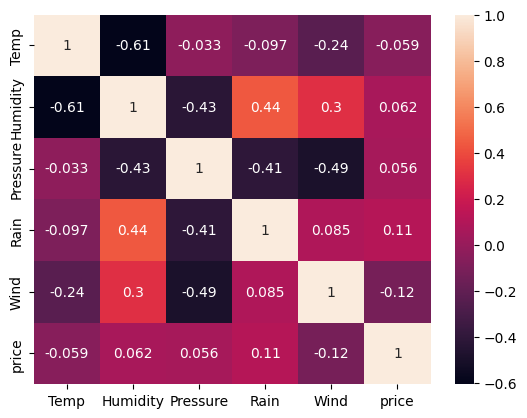

In [21]:
data=df[['Temp', 'Humidity', 'Pressure', 'Rain', 'Wind', 'price']].dropna().corr()
sns.heatmap(data,annot=True)

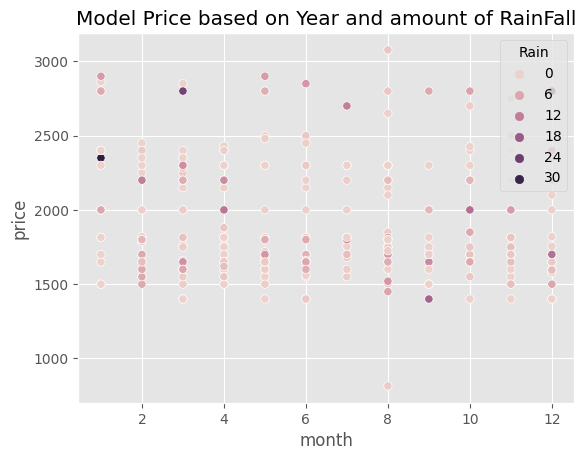

In [22]:
plt.style.use('ggplot')
sc=sns.scatterplot(x='month',
               y='price',
                hue='Rain',
               data=df)
sc.set_title('Model Price based on Year and amount of RainFall')
plt.show()

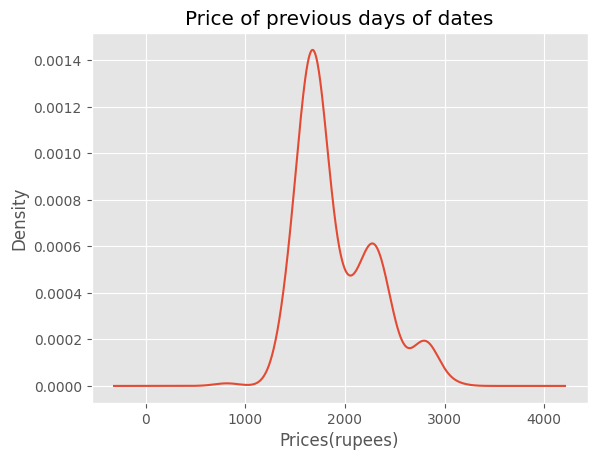

In [23]:
plot=df['price_lag_1'].plot(kind='kde',title='Price of previous days of dates')
plot.set_xlabel('Prices(rupees)')
plt.show()

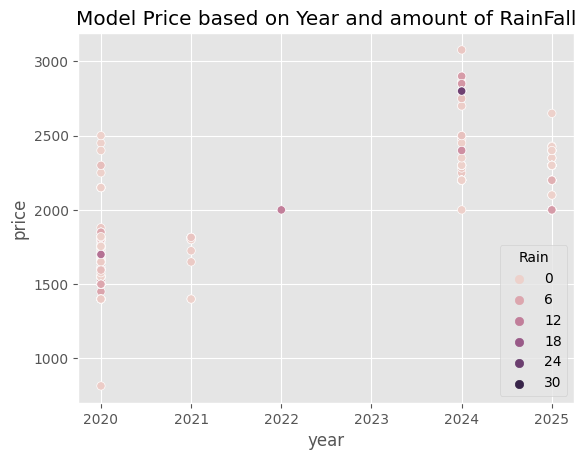

In [24]:
plt.style.use('ggplot')
sc=sns.scatterplot(x='year',
               y='price',
                hue='Rain',
               data=df)
sc.set_title('Model Price based on Year and amount of RainFall')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

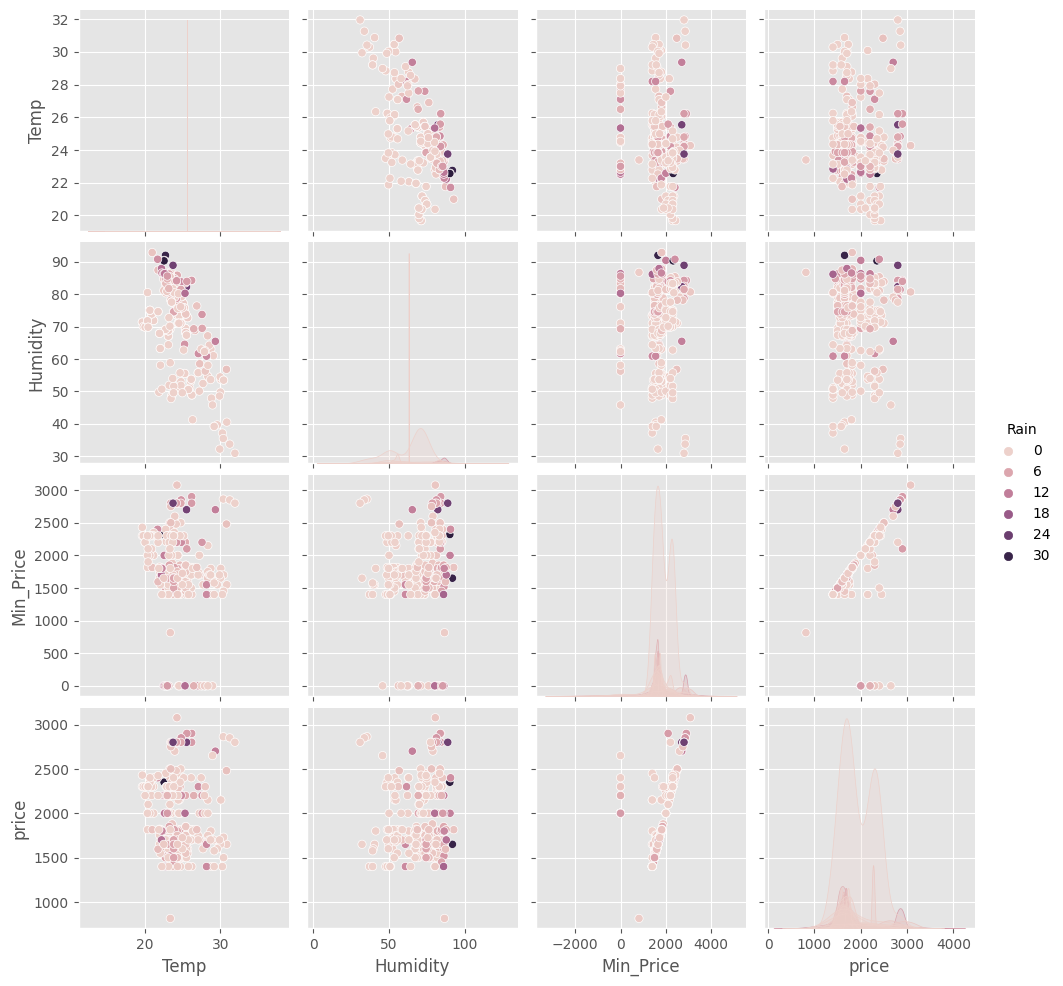

In [25]:
sns.pairplot(df,vars=['Temp','Humidity','Min_Price','price'],hue='Rain')
plt.show()